<a href="https://colab.research.google.com/github/Edmout/Analise-de-Dados-e-Boas-Praticas/blob/main/MVP%20Analise%20de%20Dados%20Eduardo%20Moutinho.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP de Análise de Dados e Boas Práticas

## Aluno: Eduardo Moutinho dos Reis



## 1 - Definição do problema


O problema abordado no dataset escolhido é prever se um cliente irá subscrever um produto de depósito a prazo com base em características demográficas e comportamentais. O objetivo é identificar clientes que estão mais propensos a aceitar uma oferta de produto, permitindo que o banco direcione suas campanhas de marketing de forma mais eficaz. Trata-se de um problema de aprendizado supervisionado, pois temos uma variável alvo (ou rótulo) que indica se o cliente aceitou ou não a oferta (representada pela variável "y"). O modelo poderá ser treinado usando exemplos rotulados para prever novos casos.

Algumas premissas sobre o problema são:

 - Os atributos disponíveis (demográficos e comportamentais) têm impacto na decisão do cliente.

 - A relação entre os atributos e a aceitação da oferta é suficientemente forte para que um modelo preditivo possa ser treinado com sucesso.

 - O comportamento passado dos clientes pode ser um bom indicativo de suas decisões futuras.

 - A distribuição dos dados é representativa da população-alvo do banco.


As condições ou restrições que podem ter sido consideradas na seleção dos dados incluem:

 - Exclusão de clientes que não foram contatados nas campanhas.

 - Limitação a um determinado período de tempo em que os dados foram coletados.

 - Foco em clientes que forneceram consentimento para serem contatados.

 - Seleção de clientes que atendem a critérios demográficos ou de renda específicos


O dataset usado neste projeto será o Marketing bancário (bank-full.csv) relacionado com campanhas de marketing direto baseadas em telefonemas de uma instituição bancária portuguesa. O dataset apresenta diversos atributos relacionados a dados dos clientes e uma variável de classe binária (0 ou 1). As variáveis ​​preditoras incluem idade, nível de escolaridade, se tem empréstimo habitacional e assim por diante. Para mais detalhes sobre este dataset, consulte: https://archive.ics.uci.edu/dataset/222/bank+marketing

Informações sobre os atributos:

1.	**age**: Idade do cliente (numérico).
2.	**job**: Tipo de trabalho do cliente (categórico: "admin.", "blue-collar", "entrepreneur", "housemaid", "management", "retired", "student", "technician", "services", "unemployed", "unknown").
3.	**marital**: Estado civil do cliente (categórico: "divorced", "married", "single", "unknown").
4.	**education**: Nível de educação do cliente (categórico: "primary", "secondary", "tertiary", "unknown").
5.	**default**: Se o cliente possui ou não crédito em atraso (categórico: "yes", "no").
6.	**balance**: Saldo bancário do cliente (numérico).
7.	**housing**: Se o cliente possui ou não um empréstimo habitacional (categórico: "yes", "no").
8.	**loan**: Se o cliente possui ou não um empréstimo pessoal (categórico: "yes", "no").
9.	**contact**: Tipo de comunicação usada para contatar o cliente (categórico: "cellular", "telephone").
10.	**day**: Último dia do mês em que o cliente foi contatado (numérico).
11.	**month**: Último mês em que o cliente foi contatado (categórico: "jan", "feb", "mar", "apr", "may", "jun", "jul", "aug", "sep", "oct", "nov", "dec").
12.	**duration**: Duração da última chamada em segundos (numérico).
13.	**campaign**: Número de contatos realizados durante esta campanha para o mesmo cliente (numérico).
14.	**pdays**: Número de dias desde o último contato com o cliente (numérico; 999 indica que o cliente não foi contatado).
15.	**previous**: Número de contatos realizados antes desta campanha (numérico).
16.	**poutcome**: Resultado da campanha anterior (categórico: "failure", "success", "nonexistent").
17.	**y**: Variável alvo que indica se o cliente aceitou ou não a oferta (categórico: "yes", "no").


In [ ]:
# Importando as bibliotecas necessárias para executar o notebook
# configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# Imports necessários
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms # para tratamento de missings
from matplotlib import cm
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

## 2 - Carga de Dados

### *Carga do Dataset*

Realizando a carga do dataset bank e exibindo as primeiras linhas

In [ ]:
# Carrega arquivo csv usando Pandas usando uma URL

# Informa a URL de importação do dataset
url="https://github.com/Edmout/Analise-de-Dados-e-Boas-Praticas/blob/main/bank-full.csv?raw=true"

# Informa o cabeçalho das colunas
colunas = ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']

# Lê o arquivo utilizando as colunas informadas
dataset = pd.read_csv(url, names=colunas, skiprows=1, delimiter=';')

# Mostra as primeiras linhas do dataset
dataset.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


## 3 - Análise de Dados

### 3.1 - Estatísticas Descritivas

Vamos iniciar examinando as dimensões do dataset, suas informações e alguns exemplos de linhas.

In [ ]:
# Visualizando o número de linhas e colunas do dataset
dataset.shape

(45211, 17)

In [ ]:
# Mostra as informações do dataset
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB
None


In [ ]:
# Mostra as 10 primeiras linhas do dataset
dataset.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


Ao visualizar as primeiras linhas do dataset já é possível notar algumas colunas como job e education que têm valores categóricos que incluem a categoria "unknown". O atributo pdays tem muitos valores -1, indicando que o cliente não foi contatado anteriormente.

In [ ]:
# Verificando se há valores faltantes
valores_faltantes = dataset.isnull().sum()
print("\nValores faltantes em cada coluna:")


Valores faltantes em cada coluna:


Não há valores faltantes no dataset, contudo já verificamos anteriomente possíveis inconsistências, devido a presença de valores "unknown".

In [ ]:
# Mostra as 10 últimas linhas do dataset
dataset.tail(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45201,53,management,married,tertiary,no,583,no,no,cellular,17,nov,226,1,184,4,success,yes
45202,34,admin.,single,secondary,no,557,no,no,cellular,17,nov,224,1,-1,0,unknown,yes
45203,23,student,single,tertiary,no,113,no,no,cellular,17,nov,266,1,-1,0,unknown,yes
45204,73,retired,married,secondary,no,2850,no,no,cellular,17,nov,300,1,40,8,failure,yes
45205,25,technician,single,secondary,no,505,no,yes,cellular,17,nov,386,2,-1,0,unknown,yes
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [ ]:
# Verifica o tipo de dataset de cada atributo
dataset.dtypes

,0
age,int64
job,object
marital,object
education,object
default,object
balance,int64
housing,object
loan,object
contact,object
day,int64


In [ ]:
# Faz um resumo estatístico do dataset (média, desvio padrão, mínimo, máximo e os quartis)
dataset.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


Podemos perceber que o saldo médio pode ser impactado por alguns outliers (clientes com saldo muito alto) e o atributo duration pode ter uma grande variação, refletindo a natureza das chamadas de venda

Vamos agora verificar se o dataset tem as classes balanceadas para que possamos tratar o desbalanceamento posteriormente, se necessário. Veremos que a variável y que contém as classes que definem se o cliente subscreveu um depósito a prazo com os valores yes (cliente subscreveu um depósito a prazo) e no (cliente não subscreveu um depósito a prazo) estão desbalanceadas. Vamos guardar esta informação, pois possivelmente precisaremos realizar algum tipo de tratamento nas próximas etapas.

In [ ]:
# distribuição das classes
print(dataset.groupby('y').size())

y
no     39922
yes     5289
dtype: int64


### 3.2. Visualizações Unimodais

Vamos criar agora um histograma para atributos quantitativos do dataset. Veremos que o atributo age sugere uma distribuição aproximadamente normal, o atributo day tem uma distribuição mais uniforme, enquanto os demais sugerem um distribuição mais exponencial ou assimétrica.

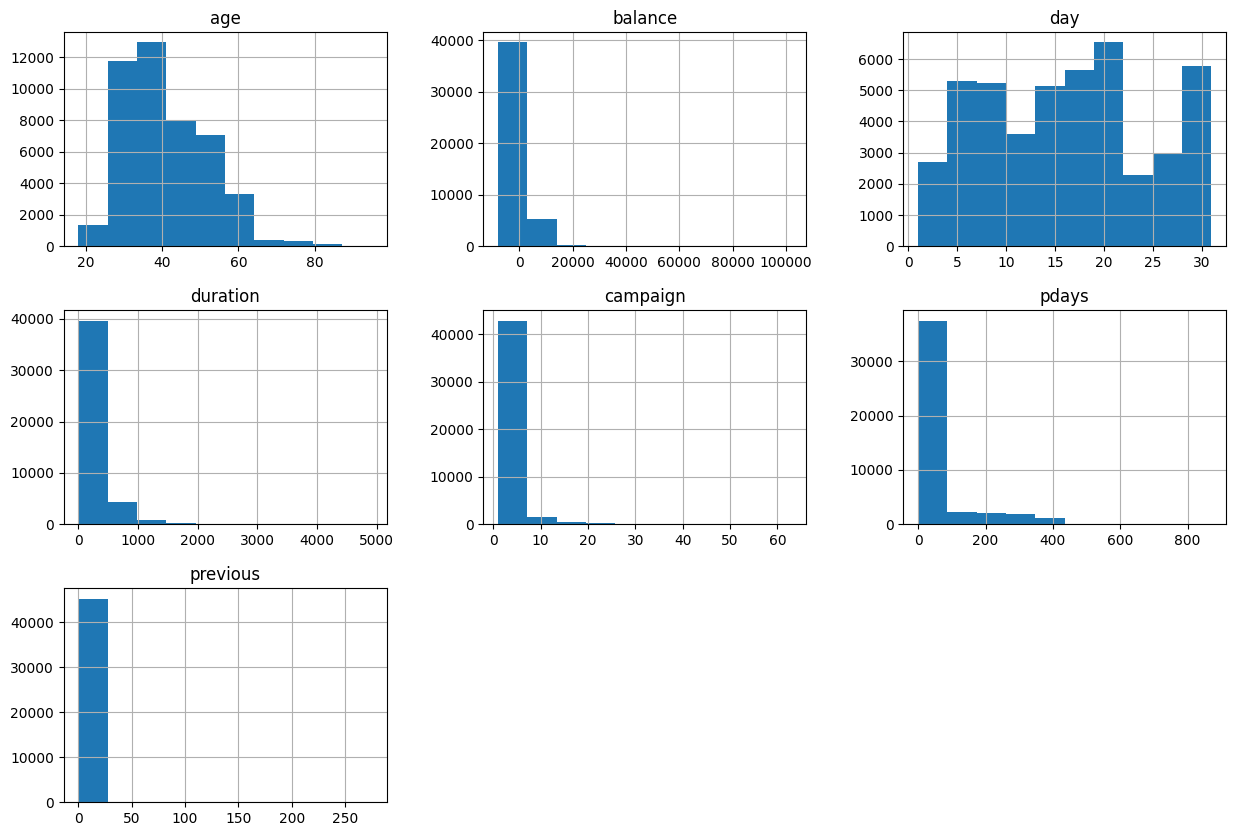

In [ ]:
# Histograma
dataset.hist(figsize = (15,10))
plt.show()

O Gráfico de Densidade, ou Density Plot, é bem parecido com o histograma, mas com uma visualização um pouco diferente. Com ele, pode ser mais fácil identificar a distribuição do atributos do dataset. Assim como fizemos com o histograma, vamos criar um density plot para cada atributo quantitativo do dataset.

Veremos que muitos dos atributos têm uma distribuição distorcida. Uma transformação como a Box-Cox, que pode aproximar a distribuição de uma Normal, pode ser útil neste caso.

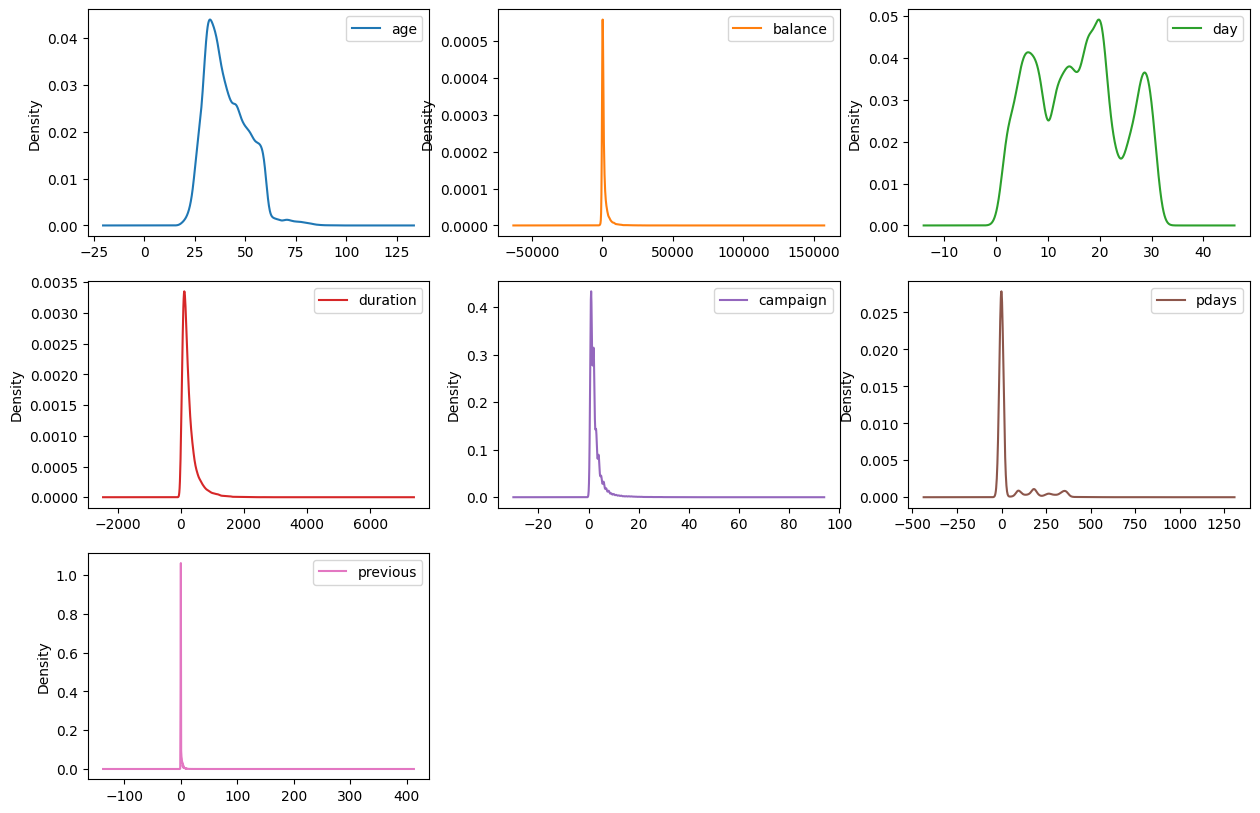

In [ ]:
# Density Plot
dataset.plot(kind = 'density', subplots = True, layout = (3,3), sharex = False, figsize = (15,10))
plt.show()

Vamos agora trabalhar com boxplots. No **boxblot**, a linha no centro (vermelha) representa o valor da mediana (segundo quartil ou p50). A linha abaixo é o 1o quartil (p25) e a linha acima o terceiro quartil (p75). O boxplot ajuda a ter uma ideia da dispersão dos dataset e os possíveis outliers.

*OBS: Se um ponto do dataset é muito distante da média (acima de 3 desvios padrão da média), pode ser considerado outlier.*

Nos gráficos bloxplot, veremos que a dispersão dos atributos do dataset é bem diferente.

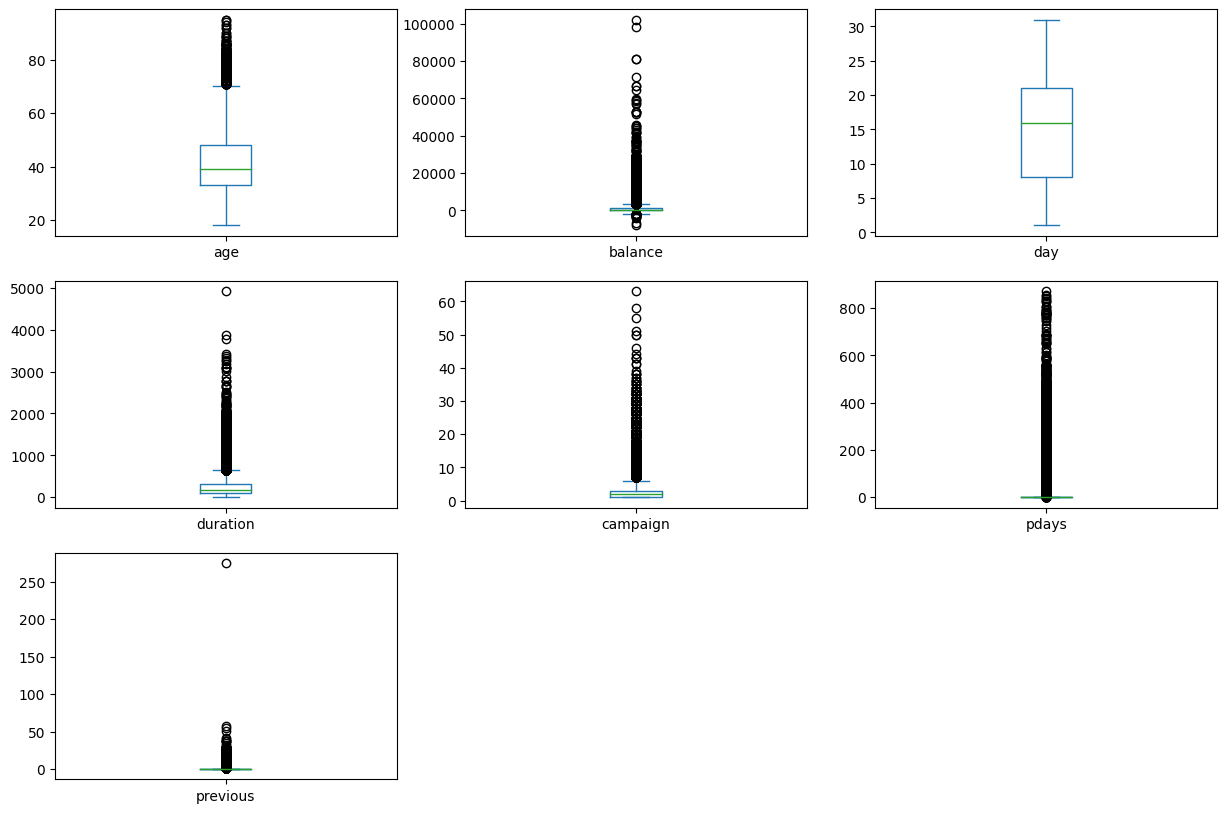

In [ ]:
# Boxplot
dataset.plot(kind = 'box', subplots = True, layout = (3,3), sharex = False, sharey = False, figsize = (15,10))
plt.show()

### 3.3. Visualizações Multimodais



O gráfico de dispersão (**scatter plot**) mostra o relacionamento entre duas variáveis. Vamos exibir um para cada par de atributos quantitativos do dataset, usando o Seaborn.

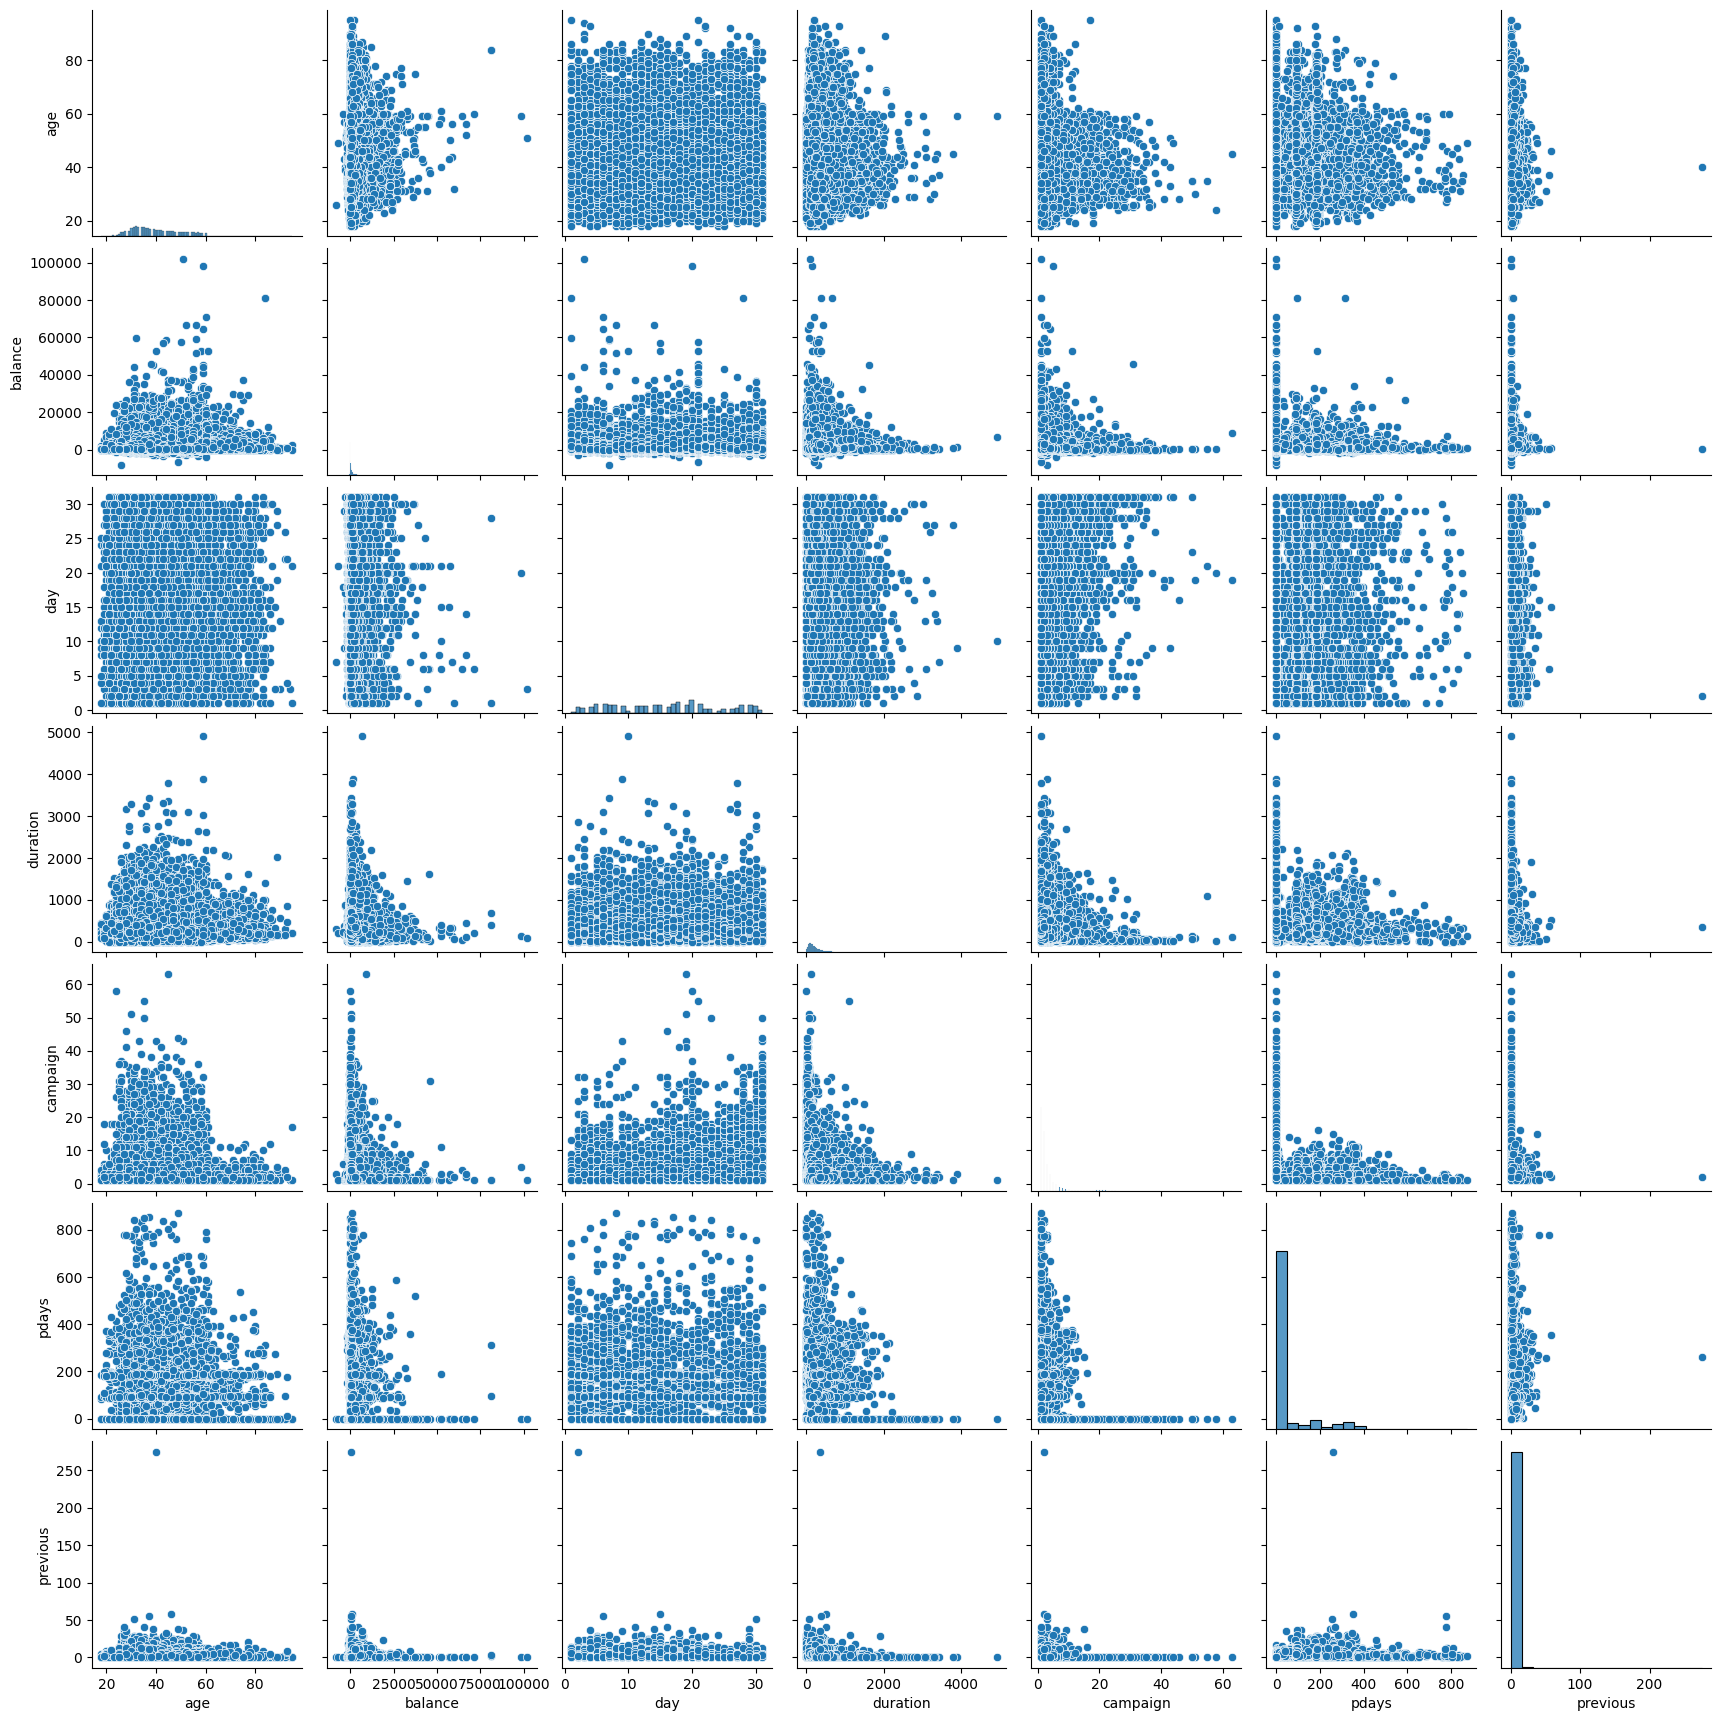

In [ ]:
# Scatter Plot com Seaborn - Variação 1

sns.pairplot(dataset)

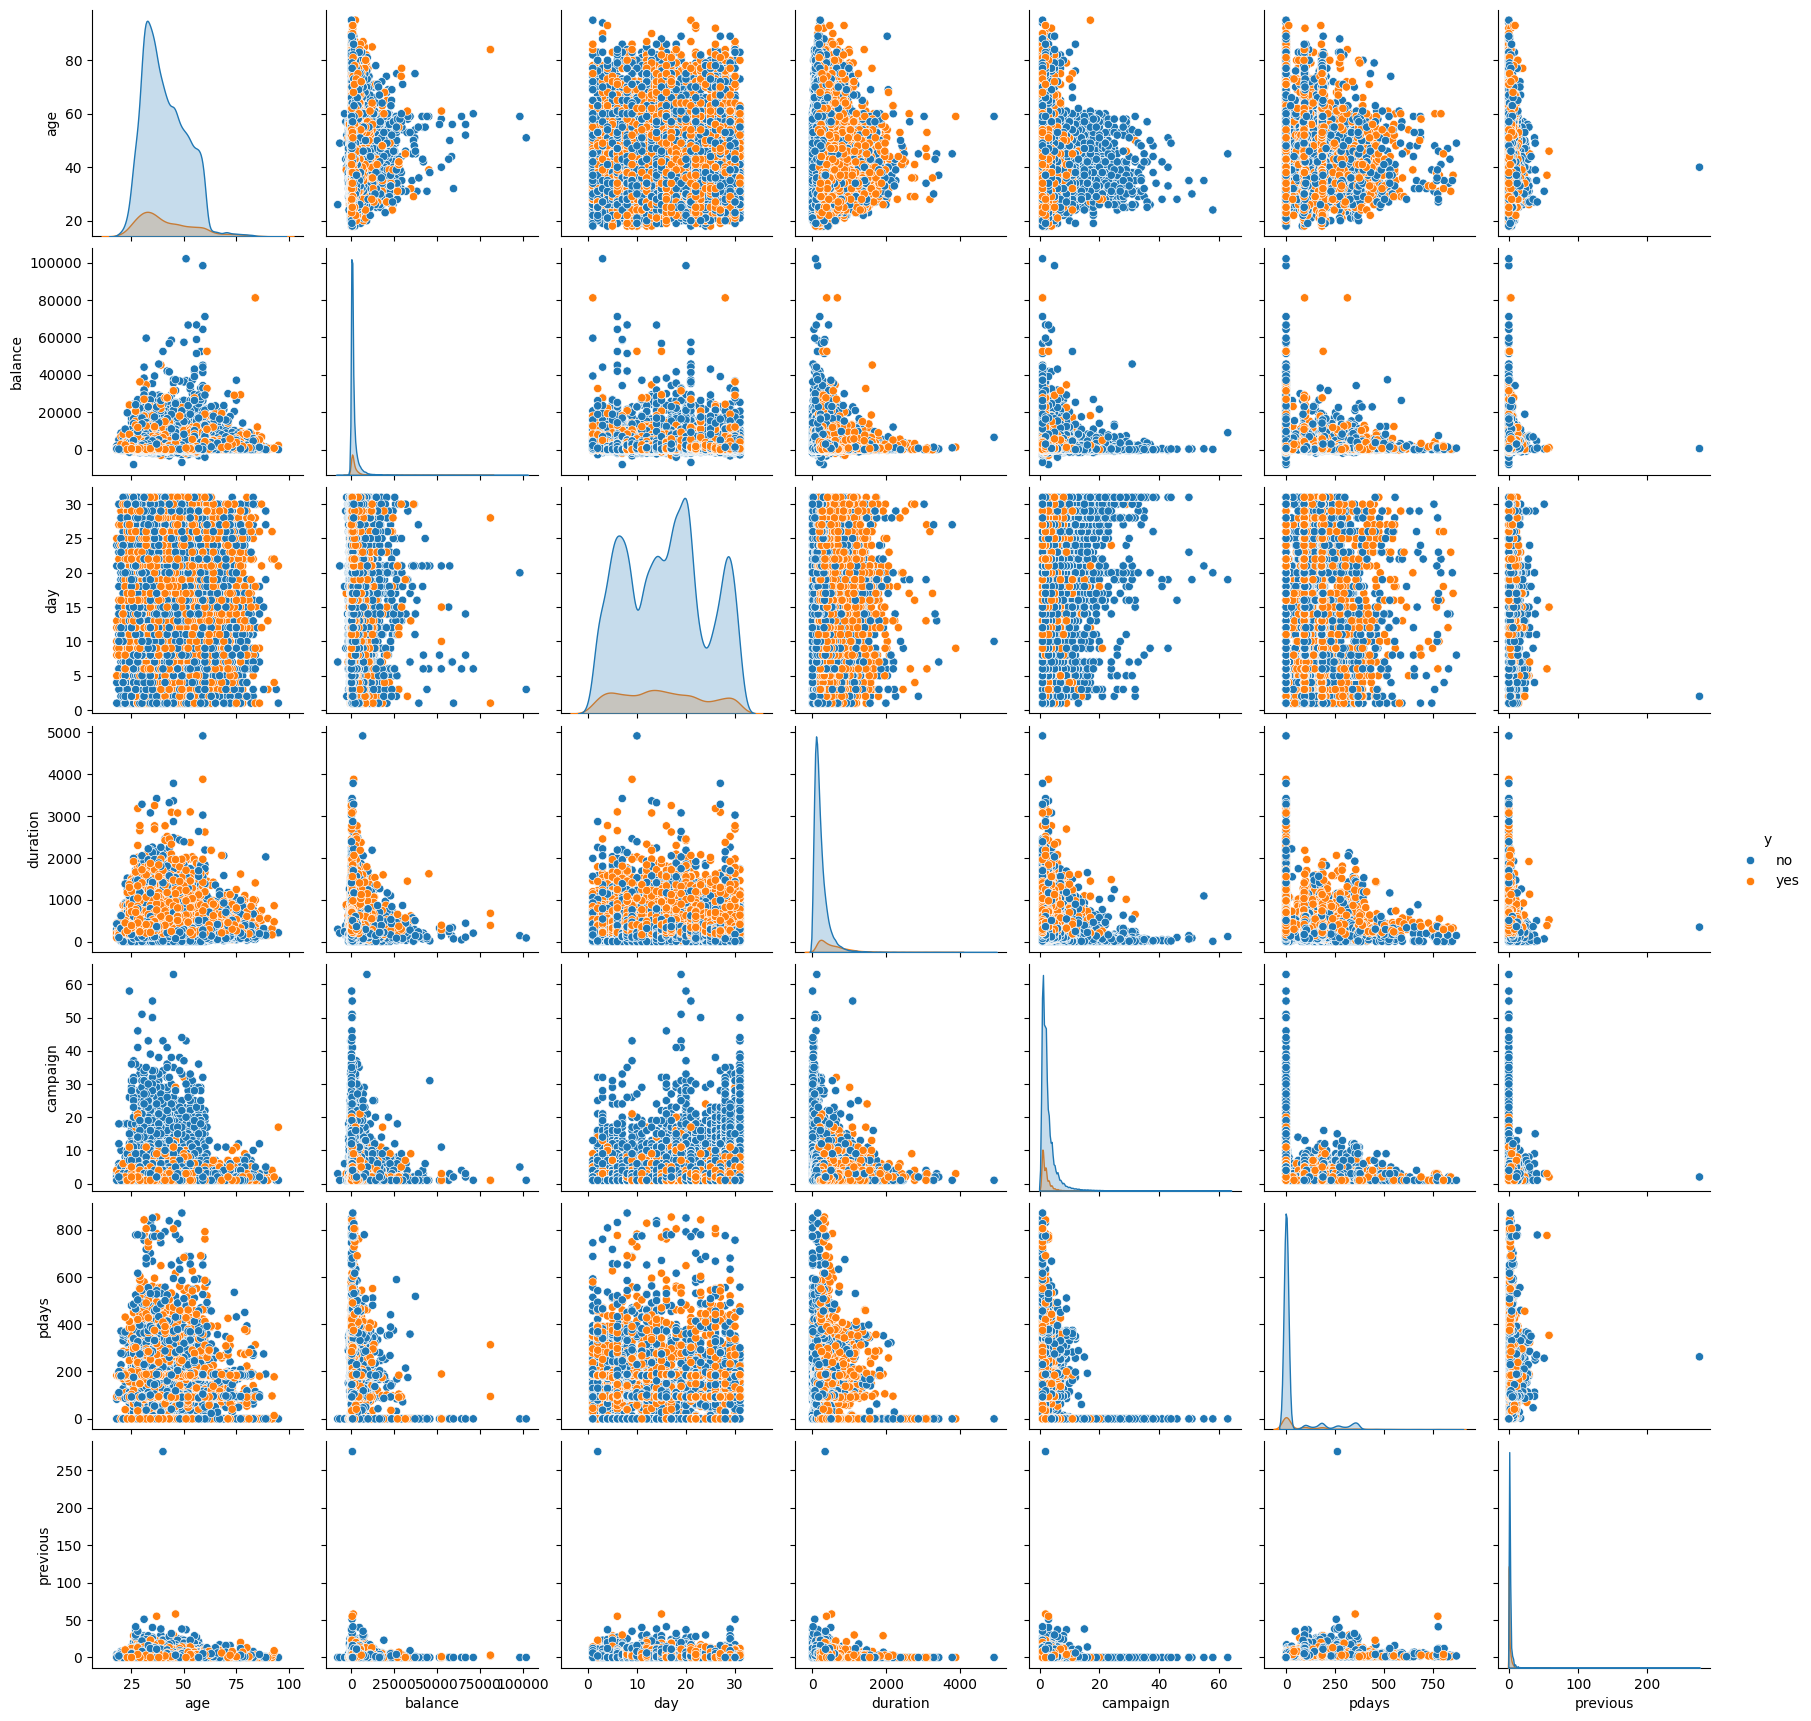

In [ ]:
# Scatter Plot com Seaborn - Variação 2

sns.pairplot(dataset, hue = "y", height = 2.5);

Através deste gráficos de comparação entre a variável age e a variável duration, por exemplo, é possível observar se há uma tendência de que idades mais avançadas (ou mais jovens) estejam associadas a uma maior duração da chamada. Se os pontos que representam aceitação estão mais concentrados em certas áreas do gráfico, isso pode indicar que tanto a idade quanto a duração influenciam a decisão do cliente. Se as pessoas que aceitam o depósito têm idades e durações específicas (por exemplo, jovens com maior duração de chamada), isso sugere que o tempo da interação pode ser um fator relevante na aceitação.

Outros insights potenciais: Se for identificado que um certo perfil de idade e uma duração de conversa são comuns entre os que aceitam o depósito, isso pode guiar campanhas de marketing e abordagem ao cliente. Por exemplo, investindo mais tempo em chamadas para grupos etários que demonstram maior aceitação. A visualização também pode ajudar a identificar outliers ou casos atípicos. Se há pontos que se distanciam do padrão esperado, isso pode sinalizar clientes que se comportam de maneira diferente e que poderiam ser investigados mais a fundo.

## 4 - Pré-Processamento de dados



Nesta etapa, vamos realizar operações de preparação de dados para o tratamento de valores missings (faltantes) e limpeza de dados e posteriormente iremos realizar um holdout (separação do dataset em conjunto de treino e conjunto de teste). Outras transformações possíveis poderíam ser feitas posteriormente, no momento de avaliar os modelos de machine learning, como realizar uma validação cruzada com os dados padronizados, normalizados e balanceados (evitando o data leakage) e comparar o resultado com os modelos treinados com o dataset original.

### 4.1. Tratamento de Missings e Limpeza

Sabemos que o dataset não tem missings aparentes, mas valores "unknown" que parecem ser missings. Vamos então fazer este tratamento e criar uma nova visão do nosso dataset.

In [ ]:
# verificando nulls no dataset
dataset.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


In [ ]:
# salvando um NOVO dataset para tratamento de missings
# recuperando os nomes das colunas
col = list(dataset.columns)

# o novo dataset irá conter todas as colunas com exceção da última (classe)
atributos = dataset[col[0:-1]]

# Tratamento de valores ausentes
# Substituindo missings por NaN (se houver)
atributos.replace("unknown", pd.NA, inplace=True)

# Exibir a quantidade de missings por coluna
print("\nQuantidade de valores ausentes por coluna:")
print(atributos.isnull().sum())

# Remover linhas com valores ausentes
atributos.dropna(inplace=True)

# Limpeza de valores "unknown" e zero
# Limpando variáveis numéricas e categóricas

# Remover ou substituir valores zero em colunas específicas
# Tratando como exemplo a variável 'duration' para que não tenha zeros
if 'duration' in atributos.columns:
    atributos = atributos[atributos['duration'] > 0]

# Para variáveis categóricas, tratamento para valores "unknown"
# Removendo linhas
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

for col in categorical_columns:
    if col in atributos.columns:
        atributos = atributos[atributos[col] != "unknown"]

# Exibir o tamanho do dataset após limpeza
print("\nTamanho do dataset após limpeza:")
print(atributos.shape)

# Exibir informações finais do dataset
print("\nInformações finais do dataset:")
print(atributos.info())


Quantidade de valores ausentes por coluna:
age              0
job            288
marital          0
education     1857
default          0
balance          0
housing          0
loan             0
contact      13020
day              0
month            0
duration         0
campaign         0
pdays            0
previous         0
poutcome     36959
dtype: int64

Tamanho do dataset após limpeza:
(7842, 16)

Informações finais do dataset:
<class 'pandas.core.frame.DataFrame'>
Index: 7842 entries, 24060 to 45210
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        7842 non-null   int64 
 1   job        7842 non-null   object
 2   marital    7842 non-null   object
 3   education  7842 non-null   object
 4   default    7842 non-null   object
 5   balance    7842 non-null   int64 
 6   housing    7842 non-null   object
 7   loan       7842 non-null   object
 8   contact    7842 non-null   object
 9   day        7842 non-n

<Axes: >

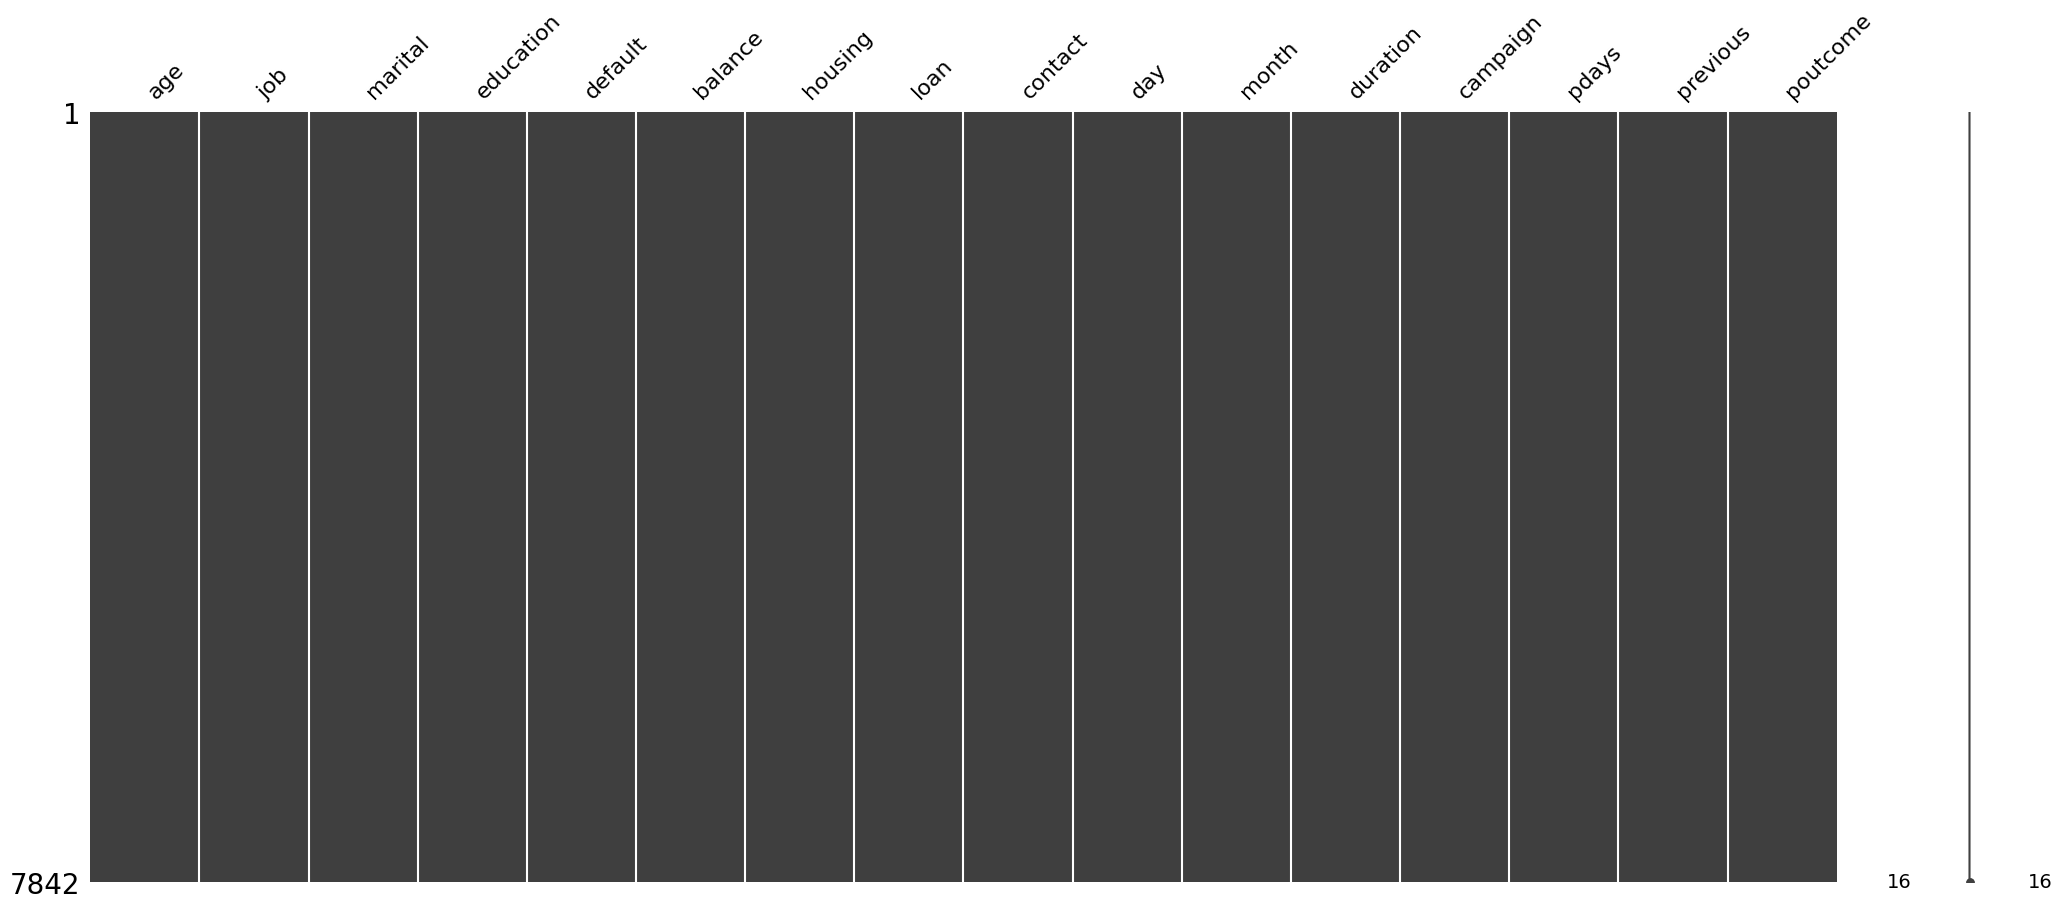

In [ ]:
# exibindo visualização matricial da nulidade do dataset
ms.matrix(atributos)

<Axes: >

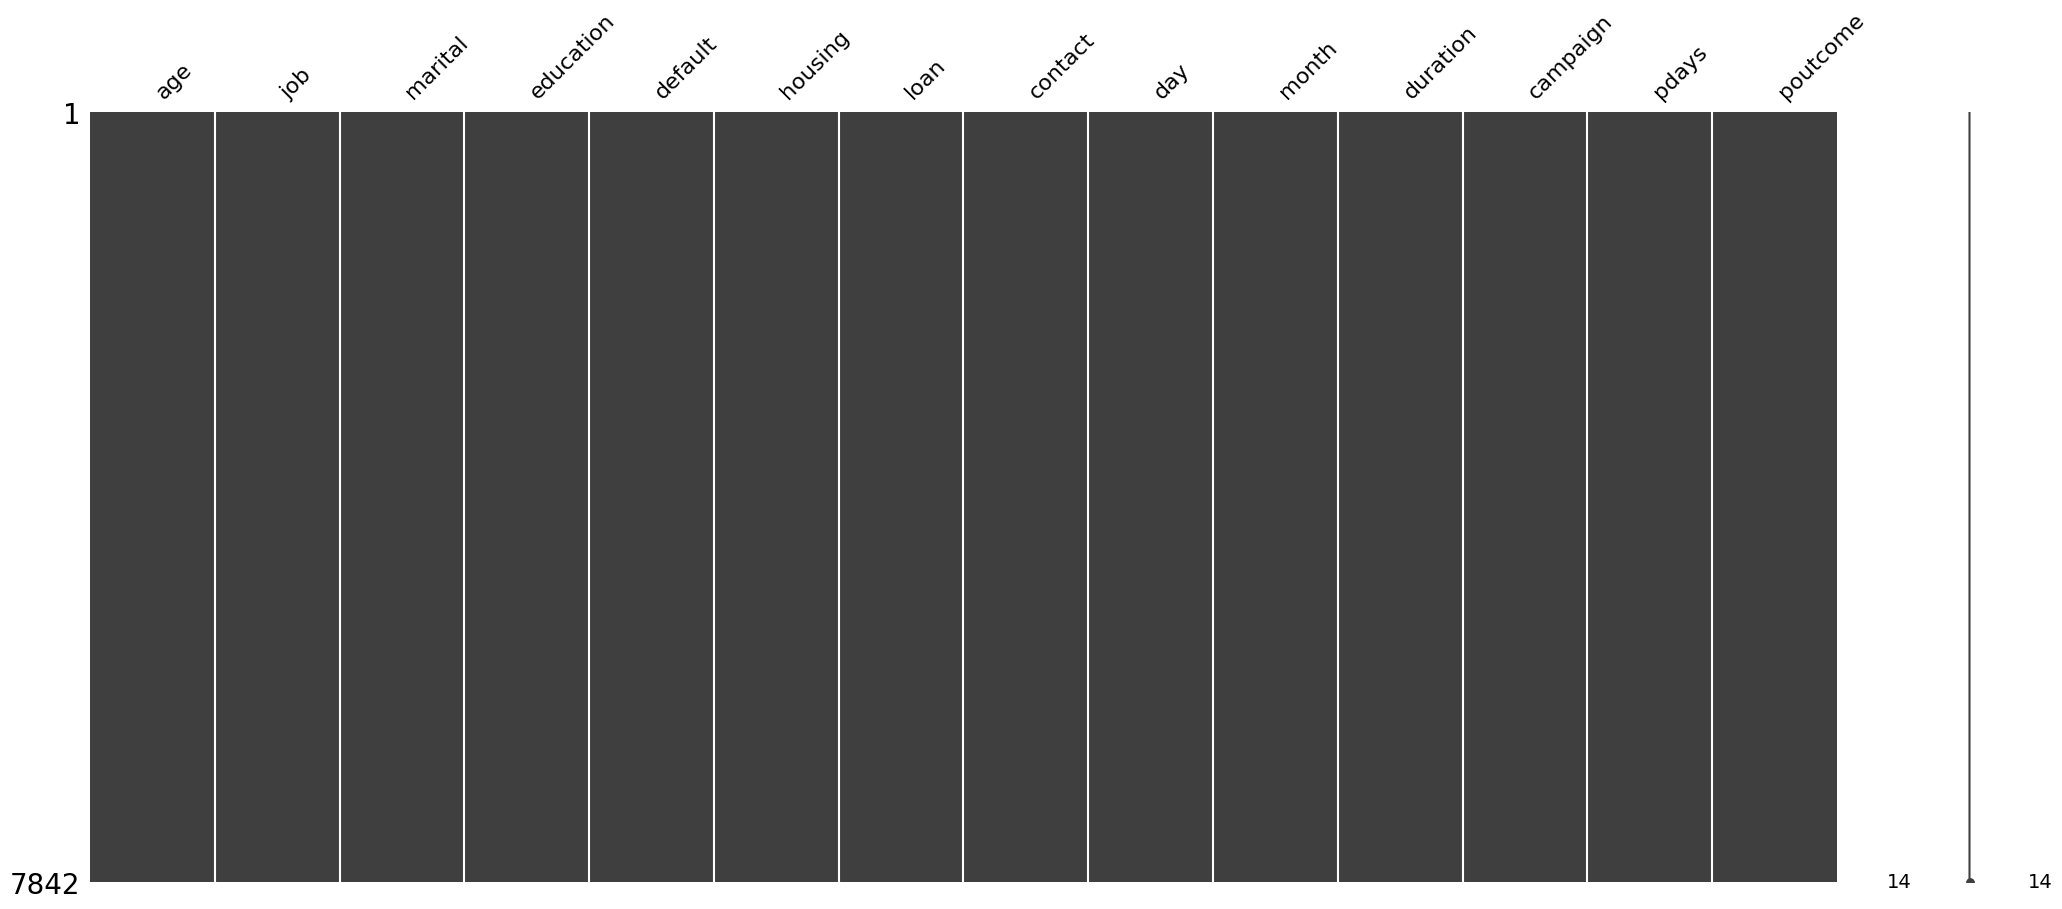

In [ ]:
# removendo as colunas 'balance' e 'previous'
atributos.drop(['balance', 'previous'], axis=1, inplace= True)

# exibindo visualização matricial da nulidade do dataset
ms.matrix(atributos)

In [ ]:
# Guardando o novo dataset para testes futuros
datasetSemMissings = atributos

# incluindo a coluna 'class' no novo dataset
datasetSemMissings['y'] = dataset['y']

# exibindo as primeiras linhas
datasetSemMissings.head()

,age,job,marital,education,default,housing,loan,contact,day,month,duration,campaign,pdays,poutcome,y
24060,33,admin.,married,tertiary,no,no,no,telephone,21,oct,39,1,151,failure,no
24062,42,admin.,single,secondary,no,yes,yes,telephone,21,oct,519,1,166,other,yes
24064,33,services,married,secondary,no,yes,no,telephone,21,oct,144,1,91,failure,yes
24072,36,management,married,tertiary,no,yes,no,telephone,22,oct,73,1,86,other,no
24077,36,management,married,tertiary,no,yes,no,telephone,23,oct,140,1,143,failure,yes


### 4.2. Separação em conjunto de treino e conjunto de teste

É uma boa prática usar um conjunto de teste, uma amostra dos dados que não será usada para a construção do modelo, mas somente no fim do projeto para confirmar a precisão do modelo final. É um teste que podemos usar para verificar o quão boa foi a construção do modelo, e para nos dar uma ideia de como o modelo irá performar nas estimativas em dados não vistos. Usaremos 80% do conjunto de dados para modelagem e guardaremos 20% para teste, usando a estratégia train-test-split.

In [ ]:
test_size = 0.20 # tamanho do conjunto de teste
seed = 7 # semente aleatória

# Separação em conjuntos de treino e teste (dataset original)
array = dataset.values
X = array[:,0:16]
y = array[:,16]
#X_train, X_test, y_train, y_test = train_test_split(X, y,
#    test_size=test_size, shuffle=True, random_state=seed) # sem estratificação
X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=test_size, shuffle=True, random_state=seed, stratify=y) # com estratificação

In [ ]:
# Separação em conjuntos de treino e teste (dataset sem missings - 2 colunas a menos!)
array = datasetSemMissings.values
X_sm = array[:,0:14]
y_sm = array[:,14]
#X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(X_sm, y_sm,
#    test_size=test_size, shuffle=True, random_state=seed) # sem estratificação
X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(X_sm, y_sm,
    test_size=test_size, shuffle=True, random_state=seed, stratify=y_sm) # com estratificação

## 5 - Conclusão

Neste MVP, procurei realizar uma análise do dataset, seguindo as etapas essenciais de análise de dados e pré-processamento. Através de estatísticas descritivas e visualizações, foi possível obter insights significativos sobre o comportamento dos clientes e suas interações com os serviços de marketing do banco.

Principais Resultados da Análise de Dados:
Estatísticas Descritivas: As análises iniciais revelaram a distribuição das variáveis, permitindo identificar características demográficas e comportamentais dos clientes. Notamos, por exemplo, que a maioria dos clientes se encontra em faixas etárias específicas e que existem padrões distintos em relação à aceitação dos depósitos.

Visualizações: Utilizamos histogramas, density plots, box plots e gráficos de dispersão para ilustrar as relações entre variáveis, especialmente em relação à variável-alvo "y". Essas visualizações ajudaram a destacar a importância de certas variáveis na tomada de decisão dos clientes, facilitando a identificação de potenciais agrupamentos e tendências.

Pré-Processamento de Dados:
Tratamento de Valores Ausentes: Aplicamos técnicas para lidar com valores ausentes e dados "unknown", garantindo que o dataset estivesse limpo e pronto para a modelagem.

Limpeza de Dados: Removemos valores zero e desnecessários na variável duration, assegurando que apenas informações relevantes fossem mantidas, o que é crucial para a construção de modelos preditivos eficazes.